# Atelier 1 : Apprentissage non supervisé avec Python

Elève : Ghofrane EL MESSI

### I. Réduction de dimensions et Visualisation des données 

### Données "villes.csv" 

In [167]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Question 1 :importer les données

In [168]:
data = pd.read_csv(r"C:\Users\ghofr\OneDrive\Bureau\TP\TP\villes.csv", sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

In [169]:
# observation des données 
data.head(4)

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0


### Question 2 : Analyse en Composantes Principales

In [117]:
# Normalization des données
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(X)
XNormalisé = scaler.transform(X)

In [118]:
XNormalisé[1]

array([ 0.116831  ,  0.05000944, -0.1285452 , -0.32148026, -0.52942092,
       -0.42704427, -0.5237069 , -0.53585369, -0.41130215, -0.27258829,
       -0.12654562,  0.04961627])

In [126]:
#appliquer la PCA
pca=PCA()
pca.fit(XNormalisé)


PCA()

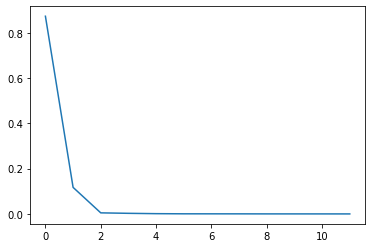

In [127]:
plt.plot(pca.explained_variance_ratio_)

In [128]:
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_[:2])

[0.87268193 0.11720602 0.00469563 0.00264791 0.00113528 0.00050136
 0.00042289 0.00032817 0.00015166 0.00011764 0.00008364 0.00002786]


0.9898879529268558

En regardant les pca.explained_variance_ratio_ cumulées sur les deux premiers axes, on a 98ù de l'information donc le nombre d’axes à retenir pour conserver un minimum de 90% de l’information.
Le plot ci-dessus aussi confirme cette conclusion.


In [129]:
pca.explained_variance_

array([10.80999558,  1.45184229,  0.0581652 ,  0.03279996,  0.01406283,
        0.00621041,  0.00523837,  0.00406512,  0.00187861,  0.00145726,
        0.0010361 ,  0.00034505])

In [138]:
import math
pca=PCA(n_components=2)
pca.fit(XNormalisé)
print(pca.components_)
valeur_lam = 1/math.sqrt(12)
valeur_lam

[[ 0.27151028  0.28846164  0.3010811   0.30354174  0.28353089  0.27841907
   0.27290295  0.28757774  0.30472022  0.3038548   0.29242808  0.2729549 ]
 [ 0.39933494  0.29907184  0.12943051 -0.11530598 -0.32314291 -0.35846763
  -0.38879639 -0.3010133  -0.11231622  0.12249226  0.26269461  0.38693688]]


0.2886751345948129

Interprétation des deux axes pricnipaux:
En comparant les valeurs propres à 1/racine(nombre de valeurs propres) on voit qu'on a sur le premier axes des valeurs proches de la moyenne. On peut dire qhe le premier axe correpond à la moyenne.

En regardant, les variables propres sur le deuxieme axe, on voit une distinction entre hiver-été.

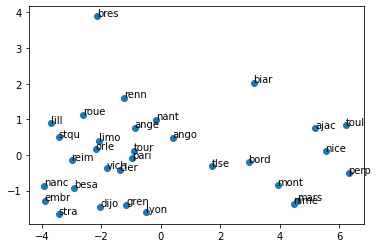

In [93]:
X_pca= pca.transform(XNormalisé)
import matplotlib
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

Interprétation des deux axes pricnipaux:
On voit deux clusters sur le plot qui correpond à deux tendances. Ce qui confirment un peu en regardant les villes notre interprétation précédente.

### Données "crimes.csv" 

In [145]:
data = pd.read_csv(r"C:\Users\ghofr\OneDrive\Bureau\TP\TP\crimes.csv", sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

In [146]:
data.head(4)

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4


In [147]:
# Normalization des données
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(X)
XNormalisé = scaler.transform(X)

In [148]:
XNormalisé[1]

array([ 0.87671955,  2.4283926 , -0.31204901,  0.73252725,  0.09295757,
        0.97202812,  1.96277156])

In [149]:
#appliquer la PCA
pca=PCA()
pca.fit(XNormalisé)

PCA()

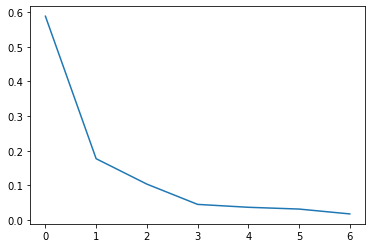

In [150]:
plt.plot(pca.explained_variance_ratio_)

In [151]:
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_[:4])

[0.58785136 0.17696026 0.10368809 0.04520458 0.03685349 0.03171992
 0.01772229]


0.9137042876203039

En regardant les pca.explained_variance_ratio_ cumulées sur les quatres premiers axes, on a 98ù de l'information donc le nombre d’axes à retenir pour conserver un minimum de 90% de l’information.
Le plot ci-dessus aussi confirme cette conclusion.

In [153]:
print(pca.components_)
valeur_lam = 1/math.sqrt(7)
valeur_lam

[[ 0.30027916  0.43175936  0.39687549  0.3966517   0.44015721  0.35735953
   0.29517681]
 [-0.62917444 -0.16943512  0.04224698 -0.34352815  0.20334059  0.40231912
   0.50242093]
 [ 0.1782453  -0.24419758  0.49586087 -0.06950972 -0.20989509 -0.53923144
   0.56838373]
 [-0.23211411  0.06221567 -0.55798926  0.62980445 -0.05755491 -0.23488987
   0.41923832]
 [ 0.53812286  0.18847069 -0.51997683 -0.50665138  0.10103335  0.03009857
   0.36975317]
 [-0.25911677  0.77327066  0.11438481 -0.17236294 -0.53598716 -0.03940645
   0.05729763]
 [-0.26759277  0.29648548  0.00390268 -0.19174459  0.64811708 -0.60169004
  -0.14704626]]


0.3779644730092272

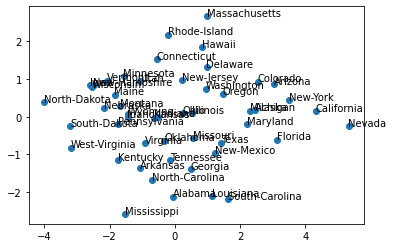

In [46]:
X_pca= pca.transform(XNormalisé)
import matplotlib
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

Interprétation des deux axes pricnipaux:
On peut voir que  l'axe 1 est un axe de moyenne criminalité sur les différentes états (comme pour les villes). 

Pour l'axe 2, on voit que les (meurtres, attaques et enlevement) ont des coefficients négatives et que les (Vol, viol, larçin, carjacking) ont des coefficients positives. L'axe 2 permet donc de différencier deux groupes de crimes.  

### Données "50_Startups.csv"

In [155]:
data = pd.read_csv(r"C:\Users\ghofr\OneDrive\Bureau\TP\TP\50_Startups.csv", sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

In [156]:
data.head(4)

,Id,Depenses R&D,Depenses Administration,Depenses Marketing Spend,Benefice
0,1,165349.20,136897.80,471784.10,192261.83
1,2,162597.70,151377.59,443898.53,191792.06
2,3,153441.51,101145.55,407934.54,191050.39
3,4,144372.41,118671.85,383199.62,182901.99


In [157]:
# Normalization des données
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(X)
XNormalisé = scaler.transform(X)

In [158]:
XNormalisé[1]

array([1.95586034, 1.08280658, 1.9236004 , 1.99942997])

In [159]:
#appliquer la PCA
pca=PCA()
pca.fit(XNormalisé)

PCA()

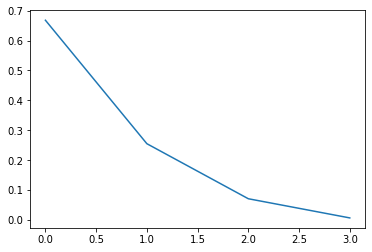

In [160]:
plt.plot(pca.explained_variance_ratio_)

In [161]:
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_[:2])

[0.66804393 0.25484695 0.07063561 0.00647351]


0.9228908746506943

En regardant les pca.explained_variance_ratio_ cumulées sur les deux premiers axes, on a 98ù de l'information donc le nombre d’axes à retenir pour conserver un minimum de 90% de l’information.
Le plot ci-dessus aussi confirme cette conclusion.

In [164]:
data.head(4)

,Id,Depenses R&D,Depenses Administration,Depenses Marketing Spend,Benefice
0,1,165349.20,136897.80,471784.10,192261.83
1,2,162597.70,151377.59,443898.53,191792.06
2,3,153441.51,101145.55,407934.54,191050.39
3,4,144372.41,118671.85,383199.62,182901.99


In [163]:
pca.components_

array([[ 0.59347855,  0.14737886,  0.52064694,  0.59580992],
       [-0.04048087, -0.95051314,  0.30797098,  0.00632069],
       [-0.39681837,  0.2723039 ,  0.79581463, -0.36751167],
       [ 0.69905629, -0.02558964,  0.0275629 , -0.71407686]])

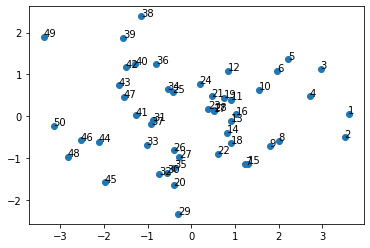

In [58]:
X_pca= pca.transform(XNormalisé)
import matplotlib
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

Interprétation des deux axes pricnipaux:

pca.components_ permet de voir que pour l'axe 1, les Depenses Administration n'est pas corrélés avec les Benefices.
Sur l'axe 2, On reagrde l'augemetation des depenses Administration et sans investissement dans la R&D et le marketing, on a un coefficient quasi nul pour le benefice.


## Clustering

### KMeans

In [72]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import pandas as pd

data = pd.read_csv(r"C:\Users\ghofr\OneDrive\Bureau\TP\TP\villes.csv", sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

scaler = StandardScaler()
scaler.fit(X)
XNormalisé = scaler.transform(X)

pca.fit(XNormalisé)

X_pca = pca.transform(XNormalisé)
colors = ['red','yellow','blue']
clustering_Kmeans = KMeans(n_clusters=3).fit(X_pca)

clustering=clustering_Kmeans.labels_


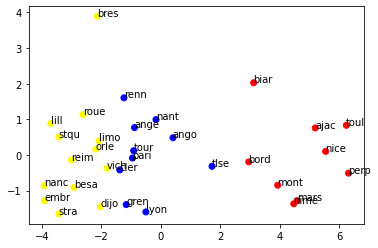

In [73]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

### Agglomerative Clustering

### Utilisation de la méthode ward 

Utilisation de ward permet de diminuer la variance des distances entre les points.

In [101]:
clustering_Agglomerative1 = AgglomerativeClustering(n_clusters=3, linkage= 'ward').fit(X_pca)
clustering1 = clustering_Agglomerative1.labels_

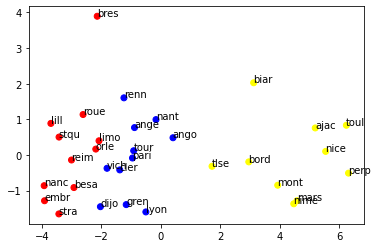

In [102]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering1, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

### Utilisation de la méthode average

Utilisation de average permet de diminuer la distance moyenne entre les points.

In [105]:
clustering_Agglomerative2 = AgglomerativeClustering(n_clusters=3, linkage= 'average').fit(X_pca)
clustering2 = clustering_Agglomerative2.labels_

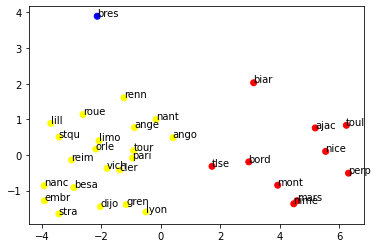

In [106]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering2, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

### Comparaison des deux méthodes ward et average: influence des méthodes d'agrégation

En comparant les résultas obtenus pour les méthodes ward et average, on voit que la méthode ward a tendance à priviligier des cluster avec un minimum de variance.
Comparé à la méthode avergae qui prilivigie les clusters dont la distance moyenne entre les points dans le meme cluster. Ce qui fait que pour la méthode average, brest est séparé dans un cluster unique.

### Détermination de la meilleure partition qui correspond à un indice maximal pour l’indice Silhouette

In [108]:
from sklearn import metrics
for i in np.arange(2, 6):
 clustering = KMeans(n_clusters=i).fit_predict(X)
 print(metrics.silhouette_score(X, clustering,metric='euclidean'))
 print()

0.6181156437258197

0.40912000832289297

0.33475600714415443

0.3165969475005018



Le score de silhouettes est utilisé pour évaluer la qualité des clusters créés à l'aide d'algorithmes de clustering tels que K-Means, en fonction de la façon dont les échantillons sont regroupés avec d'autres échantillons similaires les uns aux autres. 

Le score de Silhouette est calculé pour chaque échantillon de différents clusters. Il varie entre -1 to 1. If the score is 1, le cluster est dense et bien séparé des autres clusters. Une valeur proche de 0 représente des clusters qui se chevauchent avec des échantillons très proches de la limite de décision des clusters voisins.

Donc d'après les résulats obtenus en passant de K=2 à K=3, on perd de l'information. Donc on peut déduire que K=2 est la valeur optimal. 